In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Logistic regression default

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

Default (with enrolled)
Dropout F1 Score: 0.7925600984645144
Dropout F1 Score var: 0.00013314368919266887
Wilcoxon 0.0006533107814151377
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.79       284
    Enrolled       0.50      0.33      0.40       159
    Graduate       0.80      0.94      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


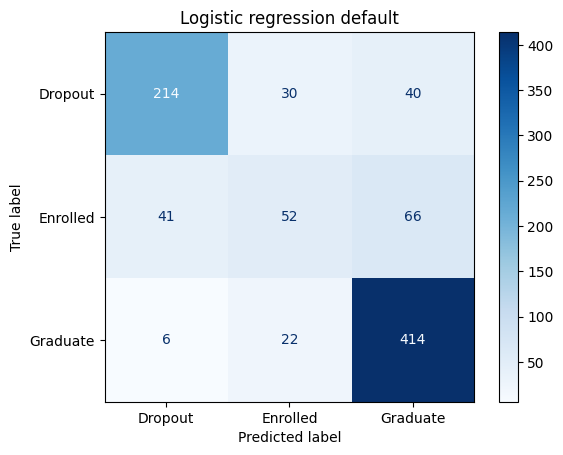

In [18]:
max_iter=10000
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []
for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

print("Default (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred=preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

Default (without enrolled)
Dropout F1 Score: 0.8847802105538215
Dropout F1 Score var: 0.0002298182913285913
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.89      0.80      0.84       284
    Graduate       0.88      0.94      0.91       442

    accuracy                           0.88       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


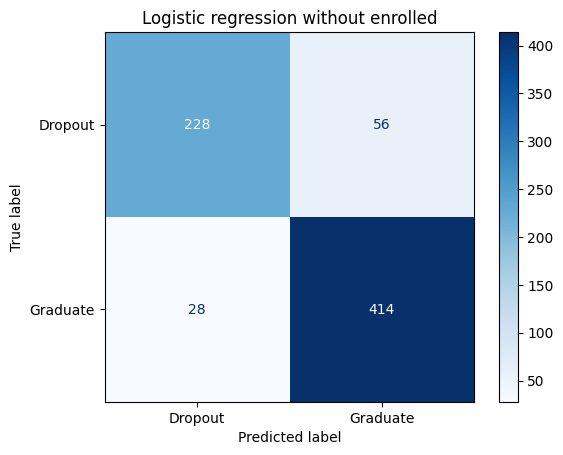

In [19]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)


print("Default (without enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Import RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

Random forest classifier default (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.7969830736843944
Dropout F1 Score var: 0.00016309342239587628
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.81      0.80      0.81       284
    Enrolled       0.61      0.42      0.50       159
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.79       885
   macro avg       0.75      0.71      0.72       885
weighted avg       0.78      0.79      0.78       885



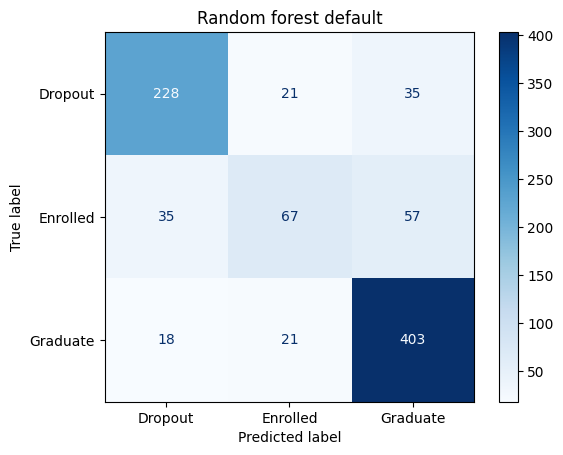

In [21]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    
print("Random forest (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier without enrolled

Iteration 1 - Dropout F1 Score: 0.8736
Iteration 2 - Dropout F1 Score: 0.8848
Iteration 3 - Dropout F1 Score: 0.8459
Iteration 4 - Dropout F1 Score: 0.8752
Iteration 5 - Dropout F1 Score: 0.8663
Iteration 6 - Dropout F1 Score: 0.8582
Iteration 7 - Dropout F1 Score: 0.8619
Iteration 8 - Dropout F1 Score: 0.8897
Iteration 9 - Dropout F1 Score: 0.8807
Iteration 10 - Dropout F1 Score: 0.8544
Iteration 11 - Dropout F1 Score: 0.8815
Iteration 12 - Dropout F1 Score: 0.8522
Iteration 13 - Dropout F1 Score: 0.8901
Iteration 14 - Dropout F1 Score: 0.9029
Iteration 15 - Dropout F1 Score: 0.8729

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8727
Std Dev: 0.0156
Min: 0.8459, Max: 0.9029


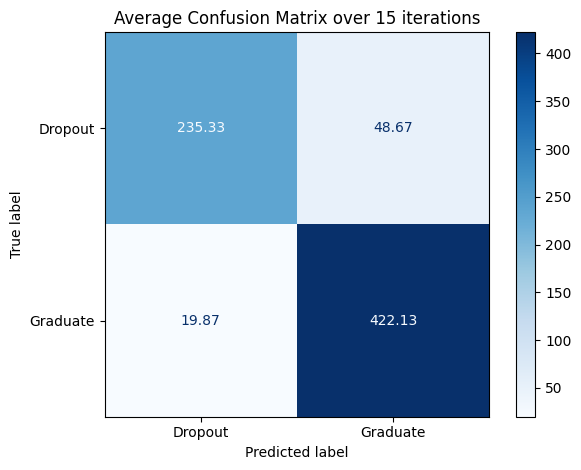

In [ ]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    # print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import wilcoxon
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import optuna


In [ ]:
def objective(trial:optuna.Trial):
    transformers = []
    scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

    model = RandomForestClassifier()

    for col in X.columns:
        scaler_choice = trial.suggest_categorical(f"scaler_{col}", list(scaler_options.keys()))
        transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

    col_transformer = ColumnTransformer(transformers)
    steps = [("scaler", col_transformer)]

    # Modelo final
    steps.append(("classifier", model))
    pipe = Pipeline(steps)
    f1_scores = []
    for iteration in range(0, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        pipe.fit(X_train,y_train)
        preds = pipe.predict(X_test)
        f1_score_per_class = f1_score(y_test, preds, average=None)
        dropout_index = le.transform(["Dropout"])[0]
        dropout_f1_score = f1_score_per_class[dropout_index]
        f1_scores.append(dropout_f1_score)
    
    statistic, pvalue = wilcoxon(x=f1_scores)

    trial.set_user_attr("var", np.var(f1_scores))
    trial.set_user_attr("std", np.std(f1_scores))
    trial.set_user_attr("wilcoxon_statistic", statistic)
    trial.set_user_attr("wilcoxon_pvalue", pvalue)
    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize",
                            storage="sqlite:///random_forest_scaler.db",
                            load_if_exists=True)
study.optimize(objective, n_trials=1000)

# Rebuild transformers from study.best_params
transformers = []
scaler_options = {  
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

for key, value in study.best_params.items():
    if key.startswith("scaler_"):
        column_name = key.replace("scaler_", "")
        scaler = scaler_options[value]
        transformers.append((f"{column_name}_scaler", scaler, [column_name]))

col_transformer = ColumnTransformer(transformers)
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled and scaler)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled and scaler")
plt.show()

Como vimos no resultado anteior, não obtivemos um resultado satisfatório utilizando os três métodos juntos com o Optuna

Tentaremos utilizar de forma separada para analisar o desempenho

Scaler

Iteration 1 - Dropout F1 Score: 0.8824
Iteration 2 - Dropout F1 Score: 0.8720
Iteration 3 - Dropout F1 Score: 0.8672
Iteration 4 - Dropout F1 Score: 0.8725
Iteration 5 - Dropout F1 Score: 0.8694
Iteration 6 - Dropout F1 Score: 0.8656
Iteration 7 - Dropout F1 Score: 0.8730
Iteration 8 - Dropout F1 Score: 0.8776
Iteration 9 - Dropout F1 Score: 0.8473
Iteration 10 - Dropout F1 Score: 0.8614
Iteration 11 - Dropout F1 Score: 0.8827
Iteration 12 - Dropout F1 Score: 0.8485
Iteration 13 - Dropout F1 Score: 0.8780
Iteration 14 - Dropout F1 Score: 0.8947
Iteration 15 - Dropout F1 Score: 0.8387

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8687
Std Dev: 0.0144
Min: 0.8387, Max: 0.8947


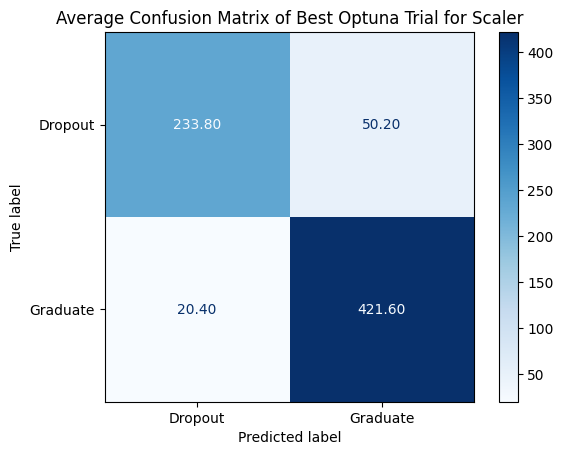

In [4]:
import numpy as np
import pandas as pd
import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("predict_students_dropout_and_academic_success.csv")
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

# === Load best trial from database ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///scaler.db"
)
best_trial = study.best_trial

# === Rebuild pipeline with best scalers ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": "passthrough"
}

transformers = []
for col in X.columns:
    scaler_key = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_key], [col]))

col_transformer = ColumnTransformer(transformers)
model = RandomForestClassifier()
pipe = Pipeline([("scaler", col_transformer), ("classifier", model)])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for Scaler")
plt.show()


PCA

Iteration 1 - Dropout F1 Score: 0.8571
Iteration 2 - Dropout F1 Score: 0.8582
Iteration 3 - Dropout F1 Score: 0.8752
Iteration 4 - Dropout F1 Score: 0.8727
Iteration 5 - Dropout F1 Score: 0.8473
Iteration 6 - Dropout F1 Score: 0.8680
Iteration 7 - Dropout F1 Score: 0.8691
Iteration 8 - Dropout F1 Score: 0.8492
Iteration 9 - Dropout F1 Score: 0.8295
Iteration 10 - Dropout F1 Score: 0.8435
Iteration 11 - Dropout F1 Score: 0.8657
Iteration 12 - Dropout F1 Score: 0.8470
Iteration 13 - Dropout F1 Score: 0.8623
Iteration 14 - Dropout F1 Score: 0.8739
Iteration 15 - Dropout F1 Score: 0.8292

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8565
Std Dev: 0.0146
Min: 0.8292, Max: 0.8752


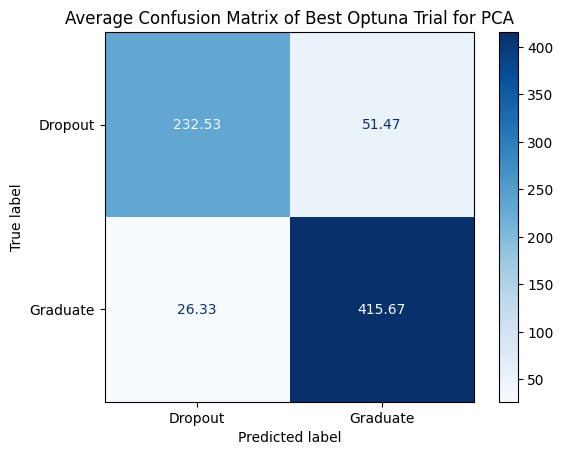

In [6]:
import pandas as pd
import numpy as np
import optuna
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load the dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load the study ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///pca.db"
)

best_params = study.best_trial.params

# === Reconstruct the pipeline using the best params ===
n_components = best_params["pca__n_components"]
svd_solver = best_params["pca__svd_solver"]
whiten = best_params["pca__whiten"]

# Adjust if using arpack
if svd_solver == "arpack":
    n_components = min(n_components, X.shape[1] - 1)

pca = PCA(
    n_components=n_components,
    svd_solver=svd_solver,
    whiten=whiten
)

model = RandomForestClassifier()

pipe = Pipeline([
    ("pca", pca),
    ("classifier", model)
])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for PCA")
plt.show()

RFE

Iteration 1 - Dropout F1 Score: 0.8766
Iteration 2 - Dropout F1 Score: 0.8636
Iteration 3 - Dropout F1 Score: 0.8755
Iteration 4 - Dropout F1 Score: 0.8710
Iteration 5 - Dropout F1 Score: 0.8470
Iteration 6 - Dropout F1 Score: 0.8731
Iteration 7 - Dropout F1 Score: 0.8864
Iteration 8 - Dropout F1 Score: 0.8678
Iteration 9 - Dropout F1 Score: 0.8523
Iteration 10 - Dropout F1 Score: 0.8619
Iteration 11 - Dropout F1 Score: 0.8926
Iteration 12 - Dropout F1 Score: 0.8752
Iteration 13 - Dropout F1 Score: 0.8609
Iteration 14 - Dropout F1 Score: 0.8641
Iteration 15 - Dropout F1 Score: 0.8692

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8692
Std Dev: 0.0114
Min: 0.8470, Max: 0.8926


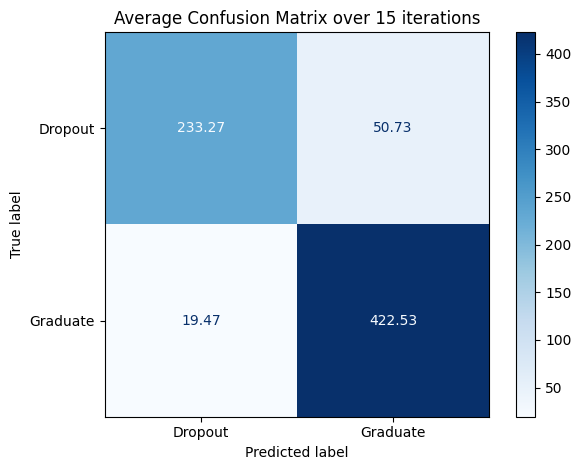

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import optuna

# === Load dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]  # remove "Enrolled" class

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best study from database ===
study_name = "no-name-4edeb741-7c80-4857-9a8a-47563ca4f188"
storage = "sqlite:///rfe.db"

study = optuna.load_study(study_name=study_name, storage=storage)
best_params = study.best_params

# === Rebuild the pipeline using best trial parameters ===
model = RandomForestClassifier()
rfe = RFE(
    estimator=model,
    n_features_to_select=best_params["rfe__n_features_to_select"],
    step=best_params["rfe__step"]
)
pipe = Pipeline([
    ("rfe", rfe),
    ("classifier", model)
])

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()


Scaler, PCA e RFE 

Iteration 1 - Dropout F1 Score: 0.8620
Iteration 2 - Dropout F1 Score: 0.8938
Iteration 3 - Dropout F1 Score: 0.8738
Iteration 4 - Dropout F1 Score: 0.8822
Iteration 5 - Dropout F1 Score: 0.8812
Iteration 6 - Dropout F1 Score: 0.8672
Iteration 7 - Dropout F1 Score: 0.8822
Iteration 8 - Dropout F1 Score: 0.8778
Iteration 9 - Dropout F1 Score: 0.8893
Iteration 10 - Dropout F1 Score: 0.8822
Iteration 11 - Dropout F1 Score: 0.8443
Iteration 12 - Dropout F1 Score: 0.8393
Iteration 13 - Dropout F1 Score: 0.8518
Iteration 14 - Dropout F1 Score: 0.8738
Iteration 15 - Dropout F1 Score: 0.8764

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8718
Std Dev: 0.0155
Min: 0.8393, Max: 0.8938


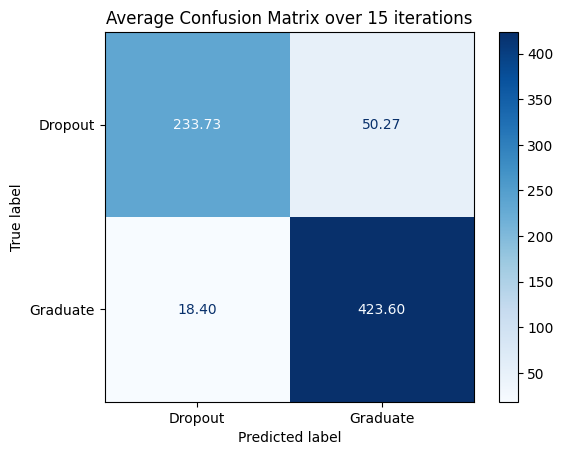

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best study trial ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///scaler_pca_rfe.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline from best trial ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optionally add PCA ===
if best_trial.params.get("pca_usage") == "pca":
    pca = PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )
    steps.append(("pca", pca))

# === Optionally add RFE ===
model = RandomForestClassifier()
if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

# === Final classifier ===
steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index + 1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for RFE")
plt.show()


Talvez se mudar os parametros do random forest